# UberEats配達データ分析

In [1]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0)

In [3]:
date = "2020/04/19"

In [4]:
FILE_PATH = './../data/trip_master.csv'
master = pd.read_csv(FILE_PATH, index_col='id')

In [5]:
print(len(master))
# master.head(5)

876


In [6]:
master.columns

Index(['date', 'day', 'day_of_week', 'distance', 'drive_time', 'drop_address',
       'drop_latitude', 'drop_longitude', 'drop_time', 'month',
       'pickup_address', 'pickup_latitude', 'pickup_longitude', 'pickup_time',
       'price', 'url', 'year', 'cash', 'peak'],
      dtype='object')

In [7]:
df = master.assign(
    pickup_datetime= master.apply(lambda x: datetime.datetime(year=x.year, month=x.month, day=x.day, 
                                                           hour=int(x.pickup_time.split(':')[0]), minute=int(x.pickup_time.split(':')[1])), axis=1),
    drop_datetime= master.apply(lambda x: datetime.datetime(year=x.year, month=x.month, day=x.day, 
                                                           hour=int(x.drop_time.split(':')[0]), minute=int(x.drop_time.split(':')[1])), axis=1),    
    shop_position_id = master.apply(lambda x: str(x.pickup_latitude) + "-" + str(x.pickup_longitude), axis=1)
                  ) .drop(['date', 'day', 'year', 'url', 'pickup_latitude', 'pickup_time', 'pickup_longitude', 'pickup_address', 
                           'day_of_week', 'pickup_time', 'drop_time', "drop_address", "drop_latitude", "drop_longitude"], axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 876 entries, d92f23b6-46a8-48d7-823c-8cadb9182193 to 6e350b7d-23d0-4647-a5ac-166e3e8dab1a
Data columns (total 9 columns):
distance            876 non-null float64
drive_time          871 non-null float64
month               876 non-null int64
price               876 non-null int64
cash                703 non-null float64
peak                703 non-null float64
pickup_datetime     876 non-null datetime64[ns]
drop_datetime       876 non-null datetime64[ns]
shop_position_id    876 non-null object
dtypes: datetime64[ns](2), float64(4), int64(2), object(1)
memory usage: 68.4+ KB


In [9]:
df['date'] = df['pickup_datetime'].dt.date
df['day_of_week_num'] = df['pickup_datetime'].dt.dayofweek
df['day_of_week'] = df['pickup_datetime'].dt.weekday_name
df['month_day_num'] = df['pickup_datetime'].dt.day
df["hour_of_day"] = df['pickup_datetime'].dt.hour
df["week_of_month"] = df['pickup_datetime'].dt.week

In [10]:
# df.head(3)

## 毎日のデータ集計

In [11]:
target_day = datetime.datetime.strptime(date, "%Y/%m/%d").date()

# target_day = datetime.datetime(2020, 3, 21).date()
# target_day = datetime.datetime.today().date()
df_day = df[df["date"] == target_day].sort_values('pickup_datetime')

In [12]:
df_day

,distance,drive_time,month,price,cash,peak,pickup_datetime,drop_datetime,shop_position_id,date,day_of_week_num,day_of_week,month_day_num,hour_of_day,week_of_month
id,,,,,,,,,,,,,,,
968877df-88c8-4e9d-99f5-4d9353c9e76d,1.64,10.0,4,421,0.0,0.0,2020-04-19 10:38:00,2020-04-19 10:55:00,35.58120346069336-139.64137268066406,2020-04-19,6,Sunday,19,10,16
23f2f74d-eae0-40d5-aaec-3ce80c9c0c27,1.03,9.0,4,388,0.0,0.0,2020-04-19 10:51:00,2020-04-19 11:11:00,35.57937240600586-139.639404296875,2020-04-19,6,Sunday,19,10,16
fc56e80d-f095-4c74-87ca-9812fab1cec5,0.89,13.2,4,491,0.0,0.0,2020-04-19 11:06:00,2020-04-19 11:30:00,35.579368591308594-139.63937377929688,2020-04-19,6,Sunday,19,11,16
f35894db-6213-426a-912f-bfd1b636cace,1.21,8.8,4,548,0.0,0.0,2020-04-19 11:27:00,2020-04-19 11:41:00,35.5811767578125-139.6414031982422,2020-04-19,6,Sunday,19,11,16
71a0dd93-feae-42d3-9f89-34cbb3c6dec7,2.41,9.6,4,593,0.0,0.0,2020-04-19 11:44:00,2020-04-19 11:59:00,35.581382751464844-139.64122009277344,2020-04-19,6,Sunday,19,11,16
9e4c8e60-c825-4381-8784-dad5f9a31359,2.04,10.9,4,583,0.0,0.0,2020-04-19 12:06:00,2020-04-19 12:24:00,35.58824920654297-139.63075256347656,2020-04-19,6,Sunday,19,12,16
8111946f-b0a5-42a0-a8b5-f18ad42978c3,1.90,9.9,4,545,0.0,0.0,2020-04-19 12:30:00,2020-04-19 12:49:00,35.58677673339844-139.63003540039062,2020-04-19,6,Sunday,19,12,16
55681216-c5a7-4165-aa3c-11740cd73daf,1.58,15.8,4,418,0.0,0.0,2020-04-19 13:01:00,2020-04-19 13:18:00,35.5881462097168-139.63072204589844,2020-04-19,6,Sunday,19,13,16
d0940eb4-dac4-4bbf-b1ba-4aa9d42cac06,1.93,21.9,4,546,0.0,0.0,2020-04-19 13:23:00,2020-04-19 13:45:00,35.58784866333008-139.62893676757812,2020-04-19,6,Sunday,19,13,16


In [13]:
drive_count = len(df_day)
drive_hours = round(df_day["drive_time"].sum() / 60, 1)
drive_length = round(df_day["distance"].sum() , 2)
total_price = df_day["price"].sum()
long_count = len(df_day[df_day["distance"] >= 2])
short_count = len(df_day[df_day["distance"] < 1])
cash_count = len(df_day[df_day["cash"] != 0])
peak_count = len(df_day[df_day["peak"] != 0])
peak_sum = int(df_day[df_day["peak"] != 0].sum()["peak"])

In [14]:
print("{}  配達件数: {}件, 配達時間: {}h, 配達距離: {}km, 配達報酬: {}円, ロング{}件, ショート{}件, ピーク{}件({}円), 現金{}件"
      .format(target_day, drive_count, drive_hours, drive_length, total_price, long_count, short_count, peak_count, peak_sum, cash_count))

2020-04-19  配達件数: 20件, 配達時間: 3.4h, 配達距離: 33.09km, 配達報酬: 10156円, ロング6件, ショート4件, ピーク0件(0円), 現金0件


## 日別の集計

In [15]:
groupby = df.groupby('date')

In [16]:
df_by_day = pd.DataFrame()
df_by_day["配達件数"] = groupby["pickup_datetime"].count()
df_by_day["配達時間(h)"] = round(groupby["drive_time"].sum() / 60, 1)
df_by_day["配達距離(km)"] = groupby["distance"].sum()
df_by_day["配達報酬(円)"] = groupby["price"].sum()
df_by_day["ロング"] = groupby.apply(lambda x: x[x.distance >= 2]['distance'].count())
df_by_day["ショート"] = groupby.apply(lambda x: x[x.distance < 2]['distance'].count())
df_by_day["ピーク件数"] = groupby.apply(lambda x: x[x.peak != 0]['peak'].count())
df_by_day["現金件数"] = groupby.apply(lambda x: x[x.cash != 0]['cash'].count())
df_by_day["1kmの時間(分)"] = round(groupby["drive_time"].sum() / groupby["distance"].sum(), 1)
df_by_day["時速"] = round(groupby["distance"].sum()/(groupby["drive_time"].sum()/60), 2)
df_by_day["平均距離"] = round(groupby["distance"].mean(), 2)

In [17]:
df_by_day.index.name = '月日'
df_by_day.tail(30)

,配達件数,配達時間(h),配達距離(km),配達報酬(円),ロング,ショート,ピーク件数,現金件数,1kmの時間(分),時速,平均距離
月日,,,,,,,,,,,
2020-02-24,17,3.1,20.84,9018,2,15,4,5,8.9,6.71,1.23
2020-02-26,8,2.1,12.98,5050,2,6,1,1,9.5,6.29,1.62
2020-02-29,13,3.3,19.31,6976,2,11,2,4,10.2,5.89,1.49
2020-03-01,14,3.4,25.74,7575,5,9,2,4,8.0,7.51,1.84
2020-03-03,15,3.0,18.75,6002,1,14,0,4,9.6,6.23,1.25
2020-03-04,6,1.2,9.64,3235,2,4,2,2,7.7,7.84,1.61
2020-03-06,12,3.1,24.87,5543,5,7,1,4,7.4,8.14,2.07
2020-03-07,12,2.4,18.40,5555,3,9,2,3,7.8,7.74,1.53
2020-03-08,7,1.7,12.76,4295,3,4,3,3,7.9,7.60,1.82


## 週別の集計

In [18]:
groupby = df.groupby('week_of_month')

In [19]:
df_by_week = pd.DataFrame()
df_by_week["配達件数"] = groupby["pickup_datetime"].count()
df_by_week["配達時間(h)"] = round(groupby["drive_time"].sum() / 60, 1)
df_by_week["配達距離(km)"] = groupby["distance"].sum()
df_by_week["配達報酬(円)"] = groupby["price"].sum()
df_by_week["ロング"] = groupby.apply(lambda x: x[x.distance >= 2]['distance'].count())
df_by_week["ショート"] = groupby.apply(lambda x: x[x.distance < 1]['distance'].count())
df_by_week["ピーク件数"] = groupby.apply(lambda x: x[x.peak != 0]['peak'].count())
df_by_week["現金件数"] = groupby.apply(lambda x: x[x.cash != 0]['cash'].count())
df_by_week["1kmの時間(分)"] = round(groupby["drive_time"].sum() / groupby["distance"].sum(), 1)
df_by_week["時速"] = round(groupby["distance"].sum()/(groupby["drive_time"].sum()/60), 2)
df_by_week["平均距離"] = round(groupby["distance"].mean(), 1)

In [20]:
df_by_week.index.name = '週番号'
df_by_week.tail(30)

,配達件数,配達時間(h),配達距離(km),配達報酬(円),ロング,ショート,ピーク件数,現金件数,1kmの時間(分),時速,平均距離
週番号,,,,,,,,,,,
1,26,6.5,40.66,12875,7,3,0,0,9.6,6.23,1.6
2,59,15.0,88.88,26269,13,14,0,0,10.1,5.93,1.5
3,42,10.4,67.94,20883,13,12,13,22,9.2,6.51,1.6
4,31,7.5,56.67,14836,11,3,5,19,8.0,7.52,1.8
5,51,13.2,87.63,26421,14,8,16,30,9.1,6.62,1.7
6,35,8.4,55.55,17142,9,10,1,9,9.1,6.62,1.6
7,56,12.5,80.61,28469,10,15,13,16,9.3,6.44,1.4
8,54,11.2,74.19,25641,4,13,8,23,9.1,6.61,1.4
9,52,11.9,78.87,28619,11,12,9,14,9.0,6.64,1.5


## 月別の集計

In [21]:
groupby = df.groupby('month')
df_by_month = pd.DataFrame()
df_by_month["配達件数"] = groupby["pickup_datetime"].count()
df_by_month["配達時間(h)"] = round(groupby["drive_time"].sum() / 60, 1)
df_by_month["配達距離(km)"] = groupby["distance"].sum()
df_by_month["配達報酬(円)"] = groupby["price"].sum()
df_by_month["ロング"] = groupby.apply(lambda x: x[x.distance >= 2]['distance'].count())
df_by_month["ショート"] = groupby.apply(lambda x: x[x.distance < 1]['distance'].count())
df_by_month["ピーク件数"] = groupby.apply(lambda x: x[x.peak != 0]['peak'].count())
df_by_month["現金件数"] = groupby.apply(lambda x: x[x.cash != 0]['cash'].count())
df_by_month["1kmの時間(分)"] = round(groupby["drive_time"].sum() / groupby["distance"].sum(), 1)
df_by_month["時速"] = round(groupby["distance"].sum()/(groupby["drive_time"].sum()/60), 2)
df_by_month["平均距離"] = round(groupby["distance"].mean(), 1)

In [22]:
df_by_month.index.name = '月'
df_by_month

,配達件数,配達時間(h),配達距離(km),配達報酬(円),ロング,ショート,ピーク件数,現金件数,1kmの時間(分),時速,平均距離
月,,,,,,,,,,,
1,168,42.3,275.81,79884,48,33,24,56,9.2,6.52,1.6
2,212,48.0,312.48,108459,37,54,39,73,9.2,6.51,1.5
3,187,43.6,332.59,88425,65,31,19,59,7.9,7.63,1.8
4,209,46.9,389.26,104824,82,32,21,64,7.2,8.29,1.9
12,100,33.1,169.77,48737,27,19,0,0,11.7,5.13,1.7


## 全データ分析

Text(0.5, 1.0, '曜日ごとの配達回数')

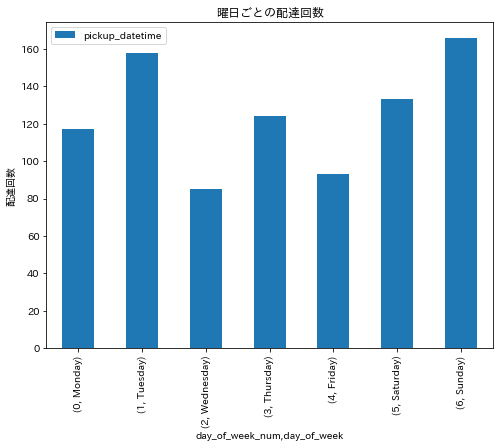

In [23]:
uber_weekdays = df.pivot_table(index=['day_of_week_num','day_of_week'],
                                  values='pickup_datetime',
                                  aggfunc='count')
uber_weekdays.plot(kind='bar')
plt.ylabel('配達回数')
plt.title('曜日ごとの配達回数')

Text(0.5, 1.0, '日にちごとの配達回数')

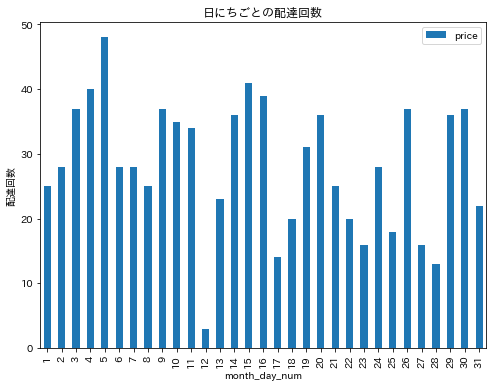

In [24]:
uber_monthdays = df.pivot_table(index=['month_day_num'],
                                  values='price',
                                  aggfunc='count')
uber_monthdays.plot(kind='bar')
plt.ylabel('配達回数')
plt.title('日にちごとの配達回数')

Text(0.5, 1.0, '時間ごとの配達回数')

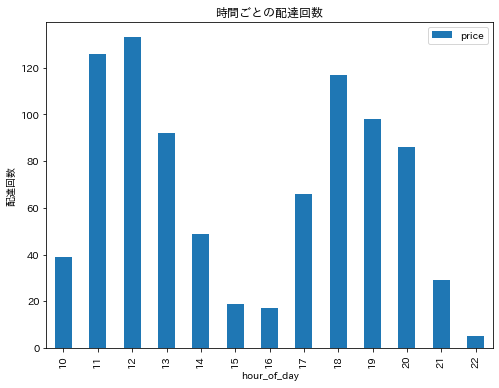

In [25]:
uber_hour = df.pivot_table(index=['hour_of_day'],
                                  values='price',
                                  aggfunc='count')
uber_hour.plot(kind='bar')
plt.ylabel('配達回数')
plt.title('時間ごとの配達回数')

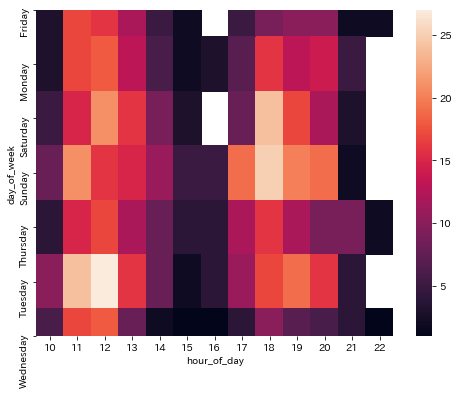

In [26]:
def count_rows(rows):
    return len(rows)

by_cross = df.groupby('day_of_week hour_of_day'.split()).apply(count_rows).unstack()
sns.heatmap(by_cross)

## 